Bernadus Sergio Halim - 0706022210056

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a **customer transaction in a certain mall**. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from **Elearn**

In [93]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/sergiohalim/data_mining-/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [94]:
# rename the Annual Income (k$)	Spending Score (1-100) column

df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Display the updated DataFrame column
df.head()


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
# describe data
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [96]:
# Check for null values in the dataset
null_values = df.isnull().sum()

null_values

,0
CustomerID,0
Gender,0
Age,0
Annual Income,0
Spending Score,0


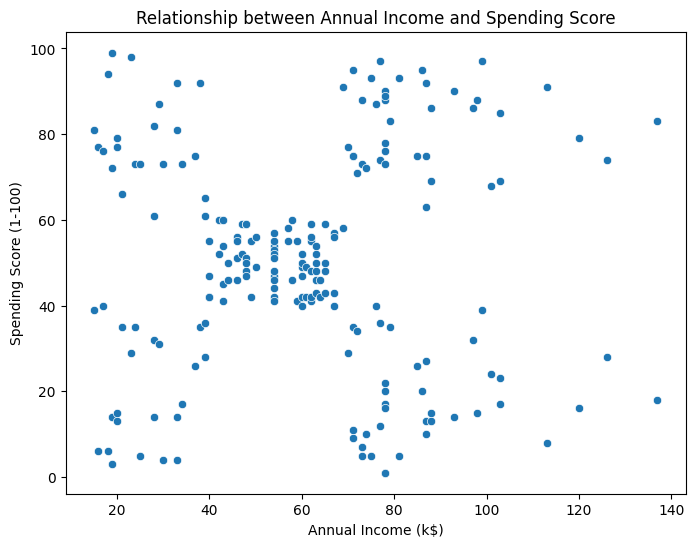

In [97]:
# make an insightful visualization and explain

# Visualize the relationship between Annual Income and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income', y='Spending Score', data=df)
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

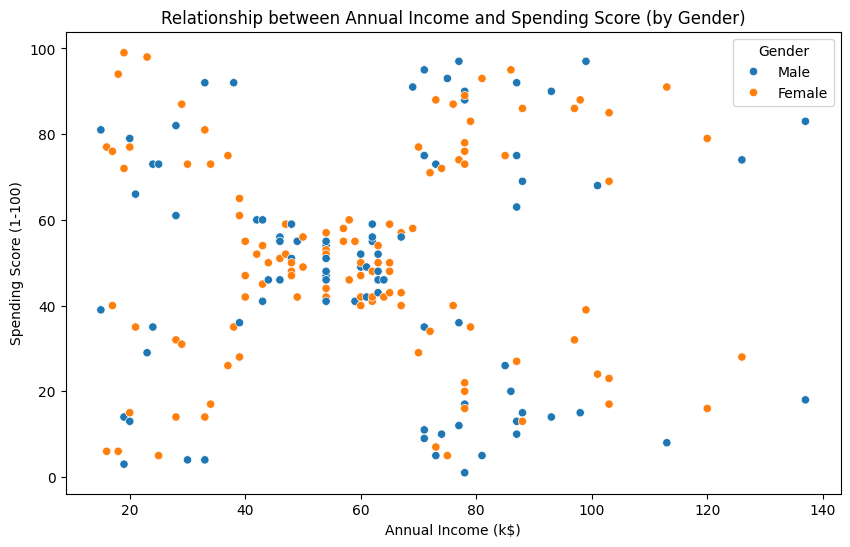

In [98]:

# Visualize the relationship between Annual Income and Spending Score with gender differentiation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Gender', data=df)
plt.title('Relationship between Annual Income and Spending Score (by Gender)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()



In [99]:
# make an insightful visualization and explain


## Data Preprocessing

For this case study, we only use income and spending score

In [100]:
# create new dataframe that consist only annual income and spending score

df_new = df[['Annual Income', 'Spending Score']]
df_new.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [101]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled, columns=['Annual Income', 'Spending Score'])
df_scaled.head()

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [102]:
# get stastical information on the new dataset

df_scaled.describe()

,Annual Income,Spending Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

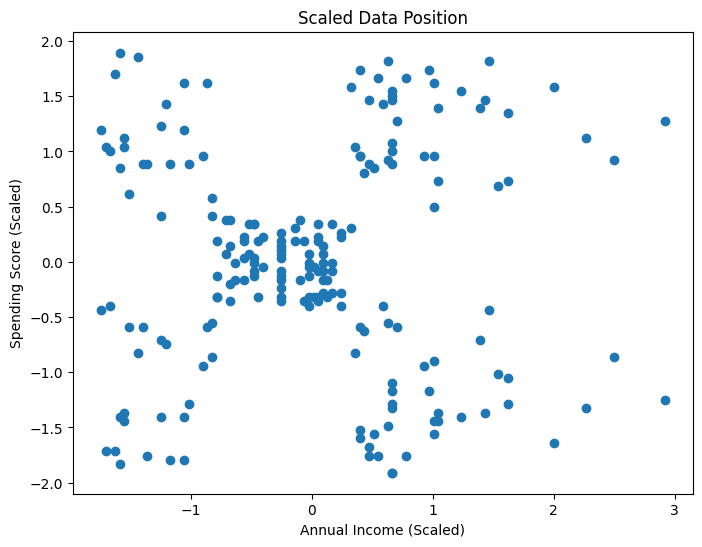

In [104]:
# Visualize the position

# Visualize the position of the scaled data using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['Annual Income'], df_scaled['Spending Score'])
plt.title('Scaled Data Position')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()



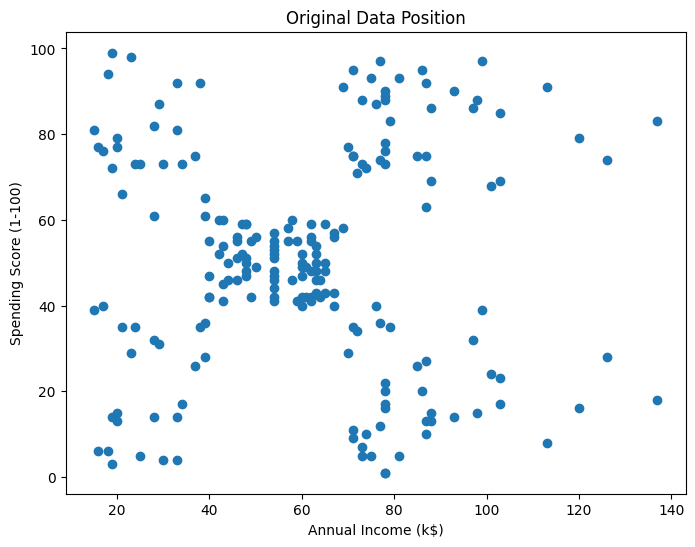

In [106]:
# Visualize the position using the original scale


plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income'], df['Spending Score'])
plt.title('Original Data Position')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [55]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

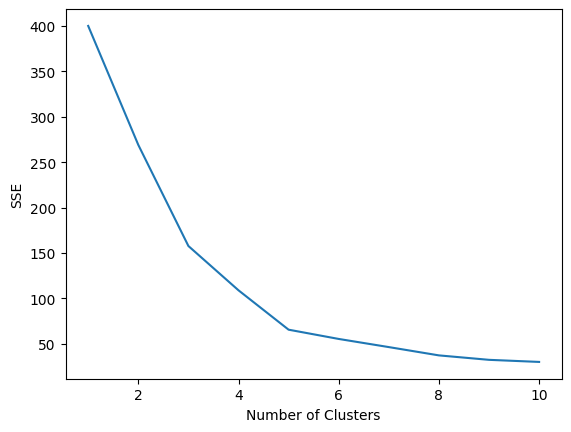

In [57]:
# manually visualize the elbow method using plotlib

plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [60]:
# using kneelocator to find the elbow/knee

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
elbow = kl.elbow

print(f"The best k for you model is {elbow}")



The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [65]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

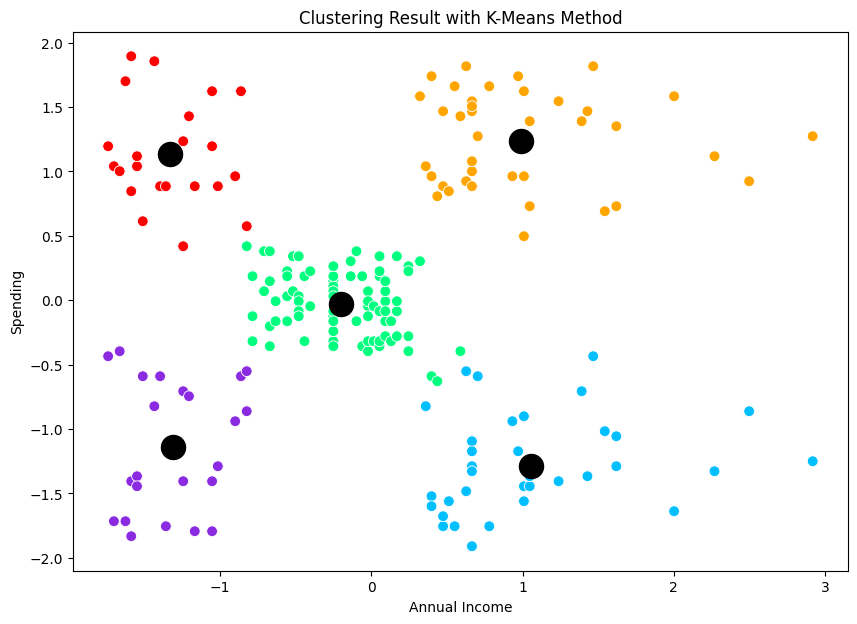

In [ ]:
# visualize the result using scater chart


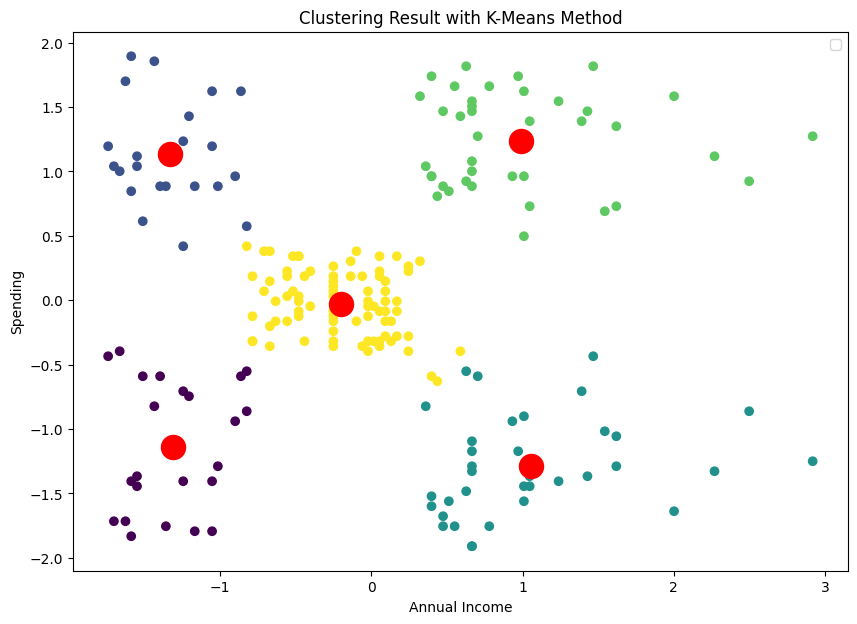

In [70]:
# visualize the result using scater chart

plt.figure(figsize=(10, 7))
plt.scatter(df_scaled['Annual Income'], df_scaled['Spending Score'], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clustering Result with K-Means Method')
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.legend()
plt.show()

In [84]:
# Inverse transform the scaled data to get the original values
df_original = scaler.inverse_transform(df_scaled)
df_original = pd.DataFrame(df_original, columns=['Annual Income', 'Spending Score'])
df_original['Cluster'] = y_kmeans

df_original.head()



,Annual Income,Spending Score,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [ ]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster


SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

In [86]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster

cluster_summary = df_original.groupby('Cluster').agg({'Spending Score': ['mean', 'std', 'min', 'max'],
                                                    'Annual Income': ['mean', 'std', 'min', 'max']})
cluster_summary

Spending Score                        Annual Income                   \
                  mean        std   min   max          mean        std   min   
Cluster                                                                        
0            20.913043  13.017167   3.0  40.0     26.304348   7.893811  15.0   
1            79.363636  10.504174  61.0  99.0     25.727273   7.566731  15.0   
2            17.114286   9.952154   1.0  39.0     88.200000  16.399067  70.0   
3            82.128205   9.364489  63.0  97.0     86.538462  16.312485  69.0   
4            49.518519   6.530909  34.0  61.0     55.296296   8.988109  39.0   

                
           max  
Cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>

In [88]:
# prompt: Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created. singkat aja

## Interpretation of Clustering Results:

# Based on the K-Means clustering, we've identified 5 distinct customer segments based on their annual income and spending score.  Each cluster exhibits different spending and income characteristics.


## Suggestions for the Company:

# 1. Targeted Marketing: Develop tailored marketing campaigns for each cluster. For example, offer exclusive discounts and promotions to high-spending, high-income customers in cluster X (identify the cluster on the graph) , while providing value deals and promotions to attract more spending from the mid-range income and low-spending cluster Y(identify the cluster on the graph).
# 2. Product Development: Analyze each cluster's preferences and tailor products or services to meet their specific needs.
# 3. Customer Retention: Implement strategies to retain valuable customers in clusters with higher spending and income. Offer loyalty programs, personalized recommendations, and exceptional customer service to enhance customer satisfaction and retention.
# 4. Customer Segmentation Analysis: Further research and understand the behaviors and preferences of customers within each cluster to personalize marketing messages and provide more accurate insights.
